# KNN Assessment

✅ This assignment is completed by `Mohammad Khorshed Alam`

---

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr 
wr.filterwarnings('ignore') 

In [3]:
df = pd.read_csv('data/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [5]:
df.Gender = le.fit_transform(df[['Gender']])

In [6]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [7]:
df.tail()

,Gender,Height,Weight
8550,0,60.483946,110.565497
8551,0,63.423372,129.921671
8552,0,65.584057,155.942671
8553,0,67.429971,151.678405
8554,0,60.921791,131.253738


# Dataset Exploration

In [8]:
# DF shape

df.shape

(8555, 3)

In [9]:
# Null value check

df.isna().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [10]:
# Duplicate row check

df.duplicated().sum()

np.int64(0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   int64  
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 200.6 KB


In [12]:
df[['Height', 'Weight']].describe()

,Height,Weight
count,8555.000000,8555.000000
mean,66.809925,165.632735
std,3.851454,32.043922
min,54.616858,65.780000
25%,63.957684,139.876803
50%,66.985923,168.521567
75%,69.604427,190.666305
max,80.450000,269.989698


⭐ **Conclusions:**
- Total values 8555 and Total columns (features) 3
- No null value in dataset
- In this dataset, there are 2 numerical columns and 1 categorical column.

# EDA

## Categorical column

### Countplot

In [13]:
# Gender value count (1 for Male, 2 for Female)

df['Gender'].value_counts()

Gender
1    5000
0    3555
Name: count, dtype: int64

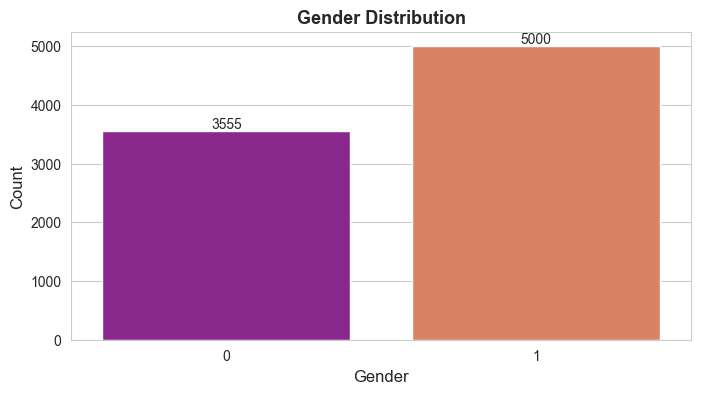

In [14]:
# Countplot for Gender Column

sns.set_style('whitegrid')

plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df, x='Gender', palette='plasma')

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title("Gender Distribution", fontsize=13, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

In [15]:
# Percentage of Male and Female

print(f"Male: {round(5000 / (5000 + 3555) * 100, 2)}%")
print(f"Female: {round(3555 / (5000 + 3555) * 100, 2)}%")

Male: 58.45%
Female: 41.55%


⭐ **Conclusions:**
- Male: 5000 (58.45%)
- Female: 3555 (41.55%)
- The number of male is higher than female in this dataset.

### Barplot

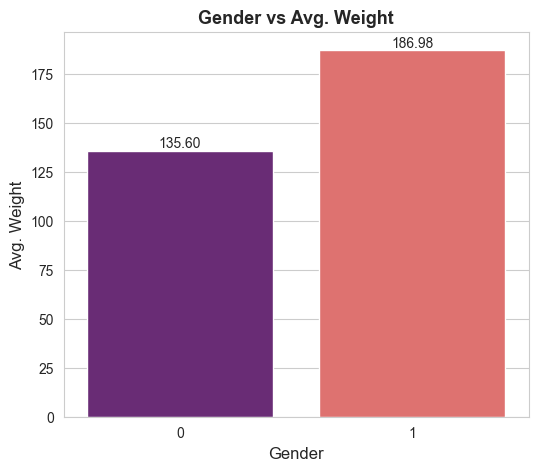

In [62]:
# Gender vs Weight (0 for Female and 1 for male)

plt.figure(figsize=(6, 5))
ax = sns.barplot(data=df, x='Gender', y='Weight', palette='magma', ci=None)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=10)

plt.title('Gender vs Avg. Weight', fontsize=13, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Avg. Weight', fontsize=12)
plt.show()

⭐ **Conclusions:**
- Avg. weight of female is 135.60 lb.
- Avg. weight of male is 186.98 lb.
- Male avg. weight is higher than female.

## Numerical columns

### Histogram and KDE

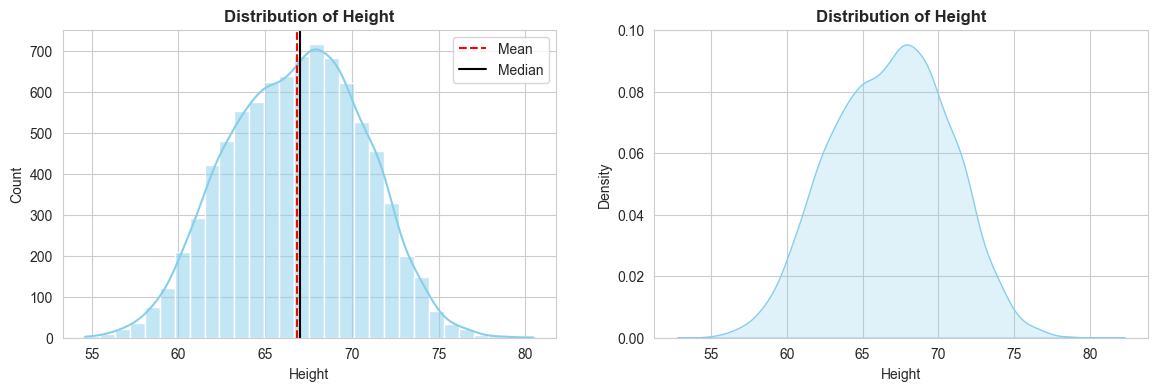

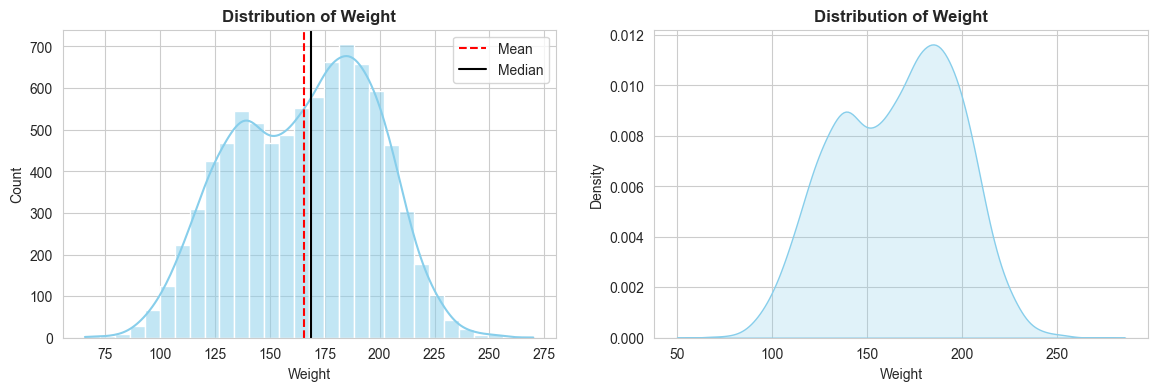

In [25]:
# Histogram

num_cols = df.drop('Gender', axis=1).columns

for col in num_cols:
    plt.figure(figsize=(14, 4))

    plt.subplot(121)
    sns.histplot(data=df, x=col, bins=30, color='skyblue', kde=True)
    plt.axvline(df[col].mean(), color='red', linestyle='--', label='Mean')
    plt.axvline(df[col].median(), c='black', label='Median')
    plt.title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    plt.legend()

    plt.subplot(122)
    sns.kdeplot(data=df, x=col, color='skyblue', fill=True)
    plt.title(f'Distribution of {col}', fontsize=12, fontweight='bold')

    plt.show()


⭐ **Conclusions:**
- Height:
    - The histogram and KDE both show a roughly normal distribution (bell-shaped).
    - Mean and median lines are almost overlapping, indecating the data is symmetrical with little skewness.
    - Most individuals fall around 66-70 inches.
- Weight:
    - The weight distribution is bimodal (two peaks) — one around ~130–150 and another around ~180–200
    - The mean is slightly higher than the median, meaning the distribution is right-skewed (pulled up by heavier weights).
    - This suggests there are two distinct subgroups in the population (male vs. female).

### Box Plot

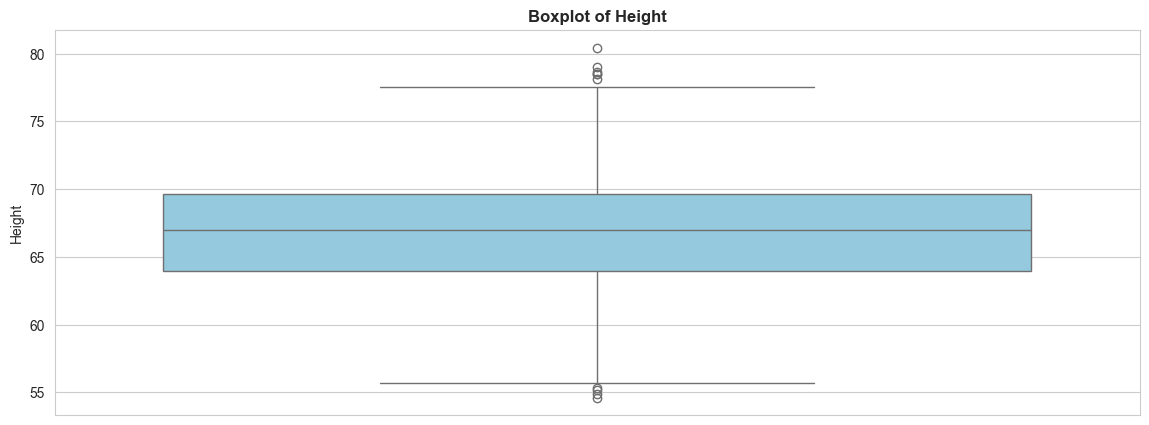

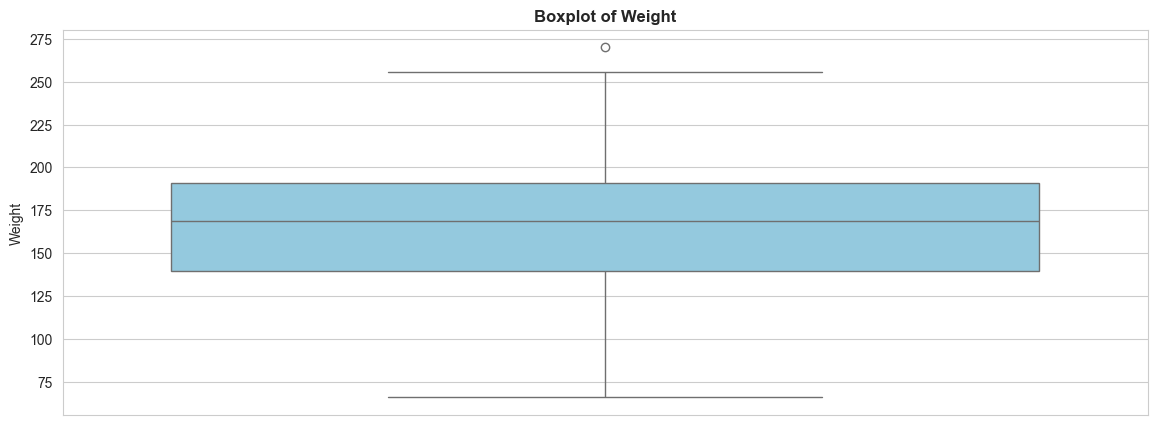

In [28]:
# Box plot

for col in num_cols:
    plt.figure(figsize=(14,5))
    sns.boxplot(data=df, y=col, color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=12, fontweight='bold')
    plt.show()

⭐ **Conclusions:**
- Height:
    - Median is around 67 inches.
    - IQR (Interquartile Range) is between ~65 and ~70 inches.
    - Only a few outliers are below 56 inches and above 78 inches.
- Weight:
    - Median is around 160–165 lbs.
    - IQR is between ~140 and ~190 lbs.
    - A few outliers are below 75 lbs and above 250 lbs.

In [32]:
# Detect outliers using IQR

def detect_outlier(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    IQR = q3 - q1
    lower = q1 - 1.5 * IQR
    upper = q3 + 1.5 * IQR
    return series[(series < lower) | (series > upper)]

print(f'Height outlier:\n{detect_outlier(df['Height'])}\n')
print(f'Weight outlier:\n {detect_outlier(df['Weight'])}')

Height outlier:
994     78.095867
1317    78.462053
2014    78.998742
3285    78.528210
3757    78.621374
5345    55.336492
6328    80.450000
6624    54.616858
7294    54.873728
7617    55.148557
Name: Height, dtype: float64

Weight outlier:
 2014    269.989698
Name: Weight, dtype: float64


⭐ **Conclusions:**
- Height:
    - 10 outliers are found.
    - These are rare but realistic human heights. So they may not be “bad data”, just uncommon.
- Weight:
    - Only one outlier is found.
    - That’s heavy but still plausible depending on the person’s height and context.

### Correlation and Heatmap

In [34]:
# Correlation between Height and Weight

corr = df[['Height', 'Weight']].corr()
corr

,Height,Weight
Height,1.000000,0.922975
Weight,0.922975,1.000000


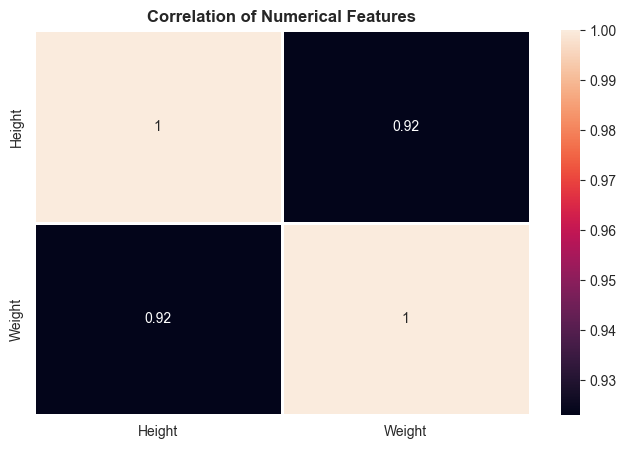

In [36]:
# Heatmap

plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, linewidths=1)
plt.title('Correlation of Numerical Features', fontsize=12, fontweight='bold')
plt.show()

⭐ **Conclusions:**
- Height and Weight are highly correlated.

# Data Preparation for Regression

In [66]:
# Spliting features and target

x = df.drop(['Weight'], axis=1)
y = df['Weight']

In [69]:
# Spliting training and testing data

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=71)

print(f'xtrain shape: {xtrain.shape}')
print(f'xtest shape: {xtest.shape}')
print(f'ytrain shape: {ytrain.shape}')
print(f'ytest shape: {ytest.shape}')

xtrain shape: (5988, 2)
xtest shape: (2567, 2)
ytrain shape: (5988,)
ytest shape: (2567,)


# Least Squared Linear Regression

In [71]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [72]:
LR.fit(xtrain, ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [73]:
# Training score

LR.score(xtrain, ytrain)

0.8990627019119446

In [74]:
# Testing score

LR.score(xtest, ytest)

0.9020636053003628

⭐ **Conclusions:**
- Training Score: 89.9%
- Testing Score: 90.2%
- The model shows no signs of overfitting or underfitting, indicating good generalization to unseen data.

# Regression Problem

# Classification Problem

# Comparison of Linear Rgeression and KNN Regressor

In [ ]:
#plot

# Comparison of Logistic Rgeression and KNN Classifier

In [ ]:
#plot